<a href="https://colab.research.google.com/github/madhuameneni/Hand_Guesture_Image_Classifier/blob/main/hand_rating.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tflite-model-maker

     |████████████████████████████████| 194kB 16.0MB/s 
     |████████████████████████████████| 1.2MB 35.5MB/s 
     |████████████████████████████████| 276kB 49.3MB/s 
     |████████████████████████████████| 71kB 10.7MB/s 
     |████████████████████████████████| 5.5MB 46.9MB/s 
     |████████████████████████████████| 1.0MB 52.2MB/s 
     |████████████████████████████████| 849kB 45.2MB/s 
     |████████████████████████████████| 81kB 10.3MB/s 
     |████████████████████████████████| 194kB 43.3MB/s 
     |████████████████████████████████| 102kB 14.3MB/s 
     |████████████████████████████████| 358kB 43.4MB/s 
     |████████████████████████████████| 174kB 39.7MB/s 
     |████████████████████████████████| 37.6MB 83kB/s 
  Created wheel for PyYAML: filename=PyYAML-5.3.1-cp36-cp36m-linux_x86_64.whl size=44621 sha256=96c5388b9b4fe05c7567c2f1a7c3481a0cab45a7086d3dc33a66113f8dc66260
  Stored in directory: /root/.cache/pip/wheels/a7/c1/ea/cf5bd31012e735dc1dfea3131a2d5eae7978b251083d6247bd
  Creat

In [ ]:
import numpy as np

import tensorflow as tf
assert tf.__version__.startswith('2')

from tflite_model_maker import configs
from tflite_model_maker import ExportFormat
from tflite_model_maker import image_classifier
from tflite_model_maker import ImageClassifierDataLoader
from tflite_model_maker import model_spec

import matplotlib.pyplot as plt

In [ ]:
import os
image_path = os.path.join(os.path.dirname("/content/drive/MyDrive/training_data"), 'training_data')

In [ ]:
data = ImageClassifierDataLoader.from_folder(image_path)
train_data, test_data = data.split(0.9)

INFO:tensorflow:Load image with size: 4198, num_label: 3, labels: one, three, two.


In [ ]:
model = image_classifier.create(train_data, epochs=5)

INFO:tensorflow:Retraining the models...
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hub_keras_layer_v1v2 (HubKer (None, 1280)              3413024   
_________________________________________________________________
dropout (Dropout)            (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 3)                 3843      
Total params: 3,416,867
Trainable params: 3,843
Non-trainable params: 3,413,024
_________________________________________________________________
None
118/118 [==============================] - 1426s 12s/step - loss: 0.7284 - accuracy: 0.7065


In [ ]:
loss, accuracy = model.evaluate(test_data)

14/14 [==============================] - 246s 11s/step - loss: 0.4094 - accuracy: 0.9548


KeyboardInterrupt: ignored

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hub_keras_layer_v1v2 (HubKer (None, 1280)              3413024   
_________________________________________________________________
dropout (Dropout)            (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 3)                 3843      
Total params: 3,416,867
Trainable params: 3,843
Non-trainable params: 3,413,024
_________________________________________________________________


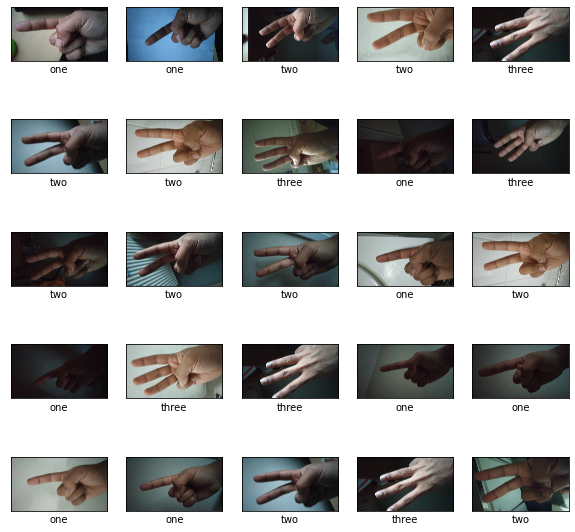

In [ ]:
plt.figure(figsize=(10,10))
for i, (image, label) in enumerate(data.gen_dataset().unbatch().take(25)):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image.numpy(), cmap=plt.cm.gray)
  plt.xlabel(data.index_to_label[label.numpy()])
plt.show()

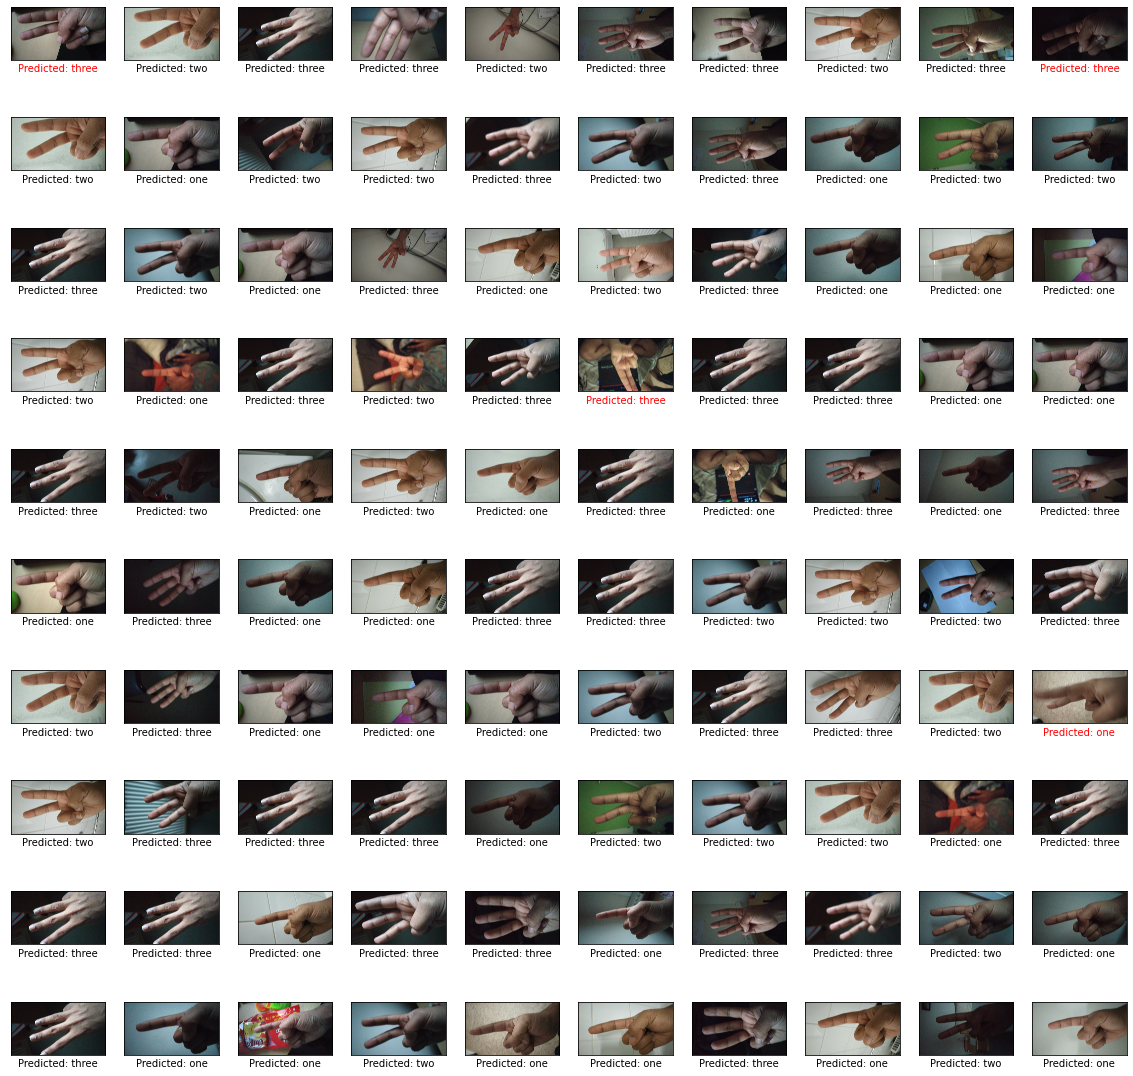

In [ ]:
def get_label_color(val1, val2):
  if val1 == val2:
    return 'black'
  else:
    return 'red'

# Then plot 100 test images and their predicted labels.
# If a prediction result is different from the label provided label in "test"
# dataset, we will highlight it in red color.
plt.figure(figsize=(20, 20))
predicts = model.predict_top_k(test_data)
for i, (image, label) in enumerate(test_data.gen_dataset().unbatch().take(100)):
  ax = plt.subplot(10, 10, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image.numpy(), cmap=plt.cm.gray)

  predict_label = predicts[i][0][0]
  color = get_label_color(predict_label,
                          test_data.index_to_label[label.numpy()])
  ax.xaxis.label.set_color(color)
  plt.xlabel('Predicted: %s' % predict_label)
plt.show()

In [ ]:
model.export(export_dir='.')

INFO:tensorflow:Assets written to: /tmp/tmpnm2c2ahu/assets


INFO:tensorflow:Assets written to: /tmp/tmpnm2c2ahu/assets


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Saving labels in /tmp/tmpo1e8mo12/labels.txt.


INFO:tensorflow:Saving labels in /tmp/tmpo1e8mo12/labels.txt.


In [ ]:
model.evaluate_tflite('model.tflite', test_data)

INFO:tensorflow:Processing example: #0
[[[[0.07843138 0.07843138 0.07843138]
   [0.04705882 0.04705882 0.05490196]
   [0.04313726 0.04313726 0.05098039]
   ...
   [0.21568628 0.21176471 0.19607843]
   [0.1815133  0.17367016 0.17759173]
   [0.21568628 0.2        0.20392157]]

  [[0.05098039 0.05098039 0.05098039]
   [0.04313726 0.04313726 0.05098039]
   [0.04313726 0.04313726 0.05098039]
   ...
   [0.2056028  0.20168123 0.18599495]
   [0.18021709 0.17237395 0.17629552]
   [0.21193978 0.19625351 0.20017508]]

  [[0.0627451  0.05490196 0.05882353]
   [0.04705882 0.03921569 0.05098039]
   [0.04705882 0.03921569 0.05098039]
   ...
   [0.20035014 0.2042717  0.18466386]
   [0.16358475 0.15966319 0.14397691]
   [0.23732738 0.22164111 0.22556268]]

  ...

  [[0.13280772 0.121043   0.08574889]
   [0.1955933  0.16029918 0.12500507]
   [0.22850223 0.19320811 0.157914  ]
   ...
   [0.05098039 0.04705882 0.07843138]
   [0.05098039 0.04705882 0.07843138]
   [0.05490196 0.06666667 0.09299556]]

  [[0.

INFO:tensorflow:Processing example: #0
[[[[0.07843138 0.07843138 0.07843138]
   [0.04705882 0.04705882 0.05490196]
   [0.04313726 0.04313726 0.05098039]
   ...
   [0.21568628 0.21176471 0.19607843]
   [0.1815133  0.17367016 0.17759173]
   [0.21568628 0.2        0.20392157]]

  [[0.05098039 0.05098039 0.05098039]
   [0.04313726 0.04313726 0.05098039]
   [0.04313726 0.04313726 0.05098039]
   ...
   [0.2056028  0.20168123 0.18599495]
   [0.18021709 0.17237395 0.17629552]
   [0.21193978 0.19625351 0.20017508]]

  [[0.0627451  0.05490196 0.05882353]
   [0.04705882 0.03921569 0.05098039]
   [0.04705882 0.03921569 0.05098039]
   ...
   [0.20035014 0.2042717  0.18466386]
   [0.16358475 0.15966319 0.14397691]
   [0.23732738 0.22164111 0.22556268]]

  ...

  [[0.13280772 0.121043   0.08574889]
   [0.1955933  0.16029918 0.12500507]
   [0.22850223 0.19320811 0.157914  ]
   ...
   [0.05098039 0.04705882 0.07843138]
   [0.05098039 0.04705882 0.07843138]
   [0.05490196 0.06666667 0.09299556]]

  [[0.

{'accuracy': 0.9547619047619048}